In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

project = pd.read_csv("D:/Self shimts/real shit/Siddarth - smart city/SMART CITY.csv")
project.head()


NAME  HUMIDITY     LIGHT  NO_MAX  NO_MIN  NO2_MAX  \
0            BopadiSquare_65    19.995  3762.914       0       0     59.0   
1      Karve Statue Square_5    20.730   529.245       0       0     82.0   
2       Lullanagar_Square_14    17.387   693.375       0       0     74.0   
3        Hadapsar_Gadital_01    18.725   723.631       0       0    110.0   
4  PMPML_Bus_Depot_Deccan_15    20.622   816.476       0       0     93.0   

   NO2_MIN  OZONE_MAX  OZONE_MIN  PM10_MAX  ...  CO2_MIN   SOUND  \
0     54.0       15.0        0.0      22.0  ...    401.0  66.133   
1     77.0       18.0        0.0      23.0  ...    374.0  63.568   
2     63.0       25.0        0.0      25.0  ...      0.0  59.362   
3    105.0        5.0        0.0      26.0  ...    427.0  72.178   
4     85.0        9.0        0.0      20.0  ...     26.0  74.756   

   TEMPRATURE_MAX  TEMPRATURE_MIN  UV_MAX  UV_MIN  AIR_PRESSURE  \
0            41.0            24.0     5.3     0.2         0.933   
1            39.0            25.0     0.8     0.1         0.930   
2            40.0            24.0     0.5     0.2         0.926   
3            38.0            26.0     1.3     0.1         0.930   
4            40.0            25.0     NaN     NaN         0.932   

   LASTUPDATEDATETIME  Lattitude  Longitude  
0    13-05-2019 12:16  18.559427  73.828656  
1    13-05-2019 12:16  18.501727  73.813595  
2    13-05-2019 12:16  18.487306  73.885650  
3    13-05-2019 12:16  18.501834  73.941478  
4    13-05-2019 12:16  18.451716  73.856170  

[5 rows x 28 columns]

In [3]:
eda = project.copy()
eda = eda.dropna()
eda

NAME  HUMIDITY      LIGHT  NO_MAX  NO_MIN  \
0                 BopadiSquare_65    19.995   3762.914       0       0   
1           Karve Statue Square_5    20.730    529.245       0       0   
2            Lullanagar_Square_14    17.387    693.375       0       0   
3             Hadapsar_Gadital_01    18.725    723.631       0       0   
5         Goodluck Square_Cafe_23    19.896    253.463       0       0   
...                           ...       ...        ...     ...     ...   
9993      Goodluck Square_Cafe_23    17.718    771.734       0       0   
9994          Hadapsar_Gadital_01    20.235   1414.801       0       0   
9995        Karve Statue Square_5    19.257   1708.640       0       0   
9996  Rajashri_Shahu_Bus_stand_19    19.728   1664.519       0       0   
9997     Chitale Bandhu Corner_41    16.956  22174.572       0       0   

      NO2_MAX  NO2_MIN  OZONE_MAX  OZONE_MIN  PM10_MAX  ...  CO2_MIN   SOUND  \
0        59.0     54.0       15.0        0.0      22.0  ...    401.0  66.133   
1        82.0     77.0       18.0        0.0      23.0  ...    374.0  63.568   
2        74.0     63.0       25.0        0.0      25.0  ...      0.0  59.362   
3       110.0    105.0        5.0        0.0      26.0  ...    427.0  72.178   
5        82.0     78.0        6.0        0.0      26.0  ...    291.0  58.582   
...       ...      ...        ...        ...       ...  ...      ...     ...   
9993     97.0     92.0       21.0        0.0      34.0  ...     29.0  58.230   
9994    136.0    131.0       20.0        0.0      34.0  ...     29.0  81.898   
9995    111.0     88.0       37.0        0.0      36.0  ...     29.0  64.768   
9996     78.0     69.0       41.0        0.0      33.0  ...      1.0  68.298   
9997     68.0     63.0       30.0        0.0      34.0  ...     29.0  74.642   

      TEMPRATURE_MAX  TEMPRATURE_MIN  UV_MAX  UV_MIN  AIR_PRESSURE  \
0               41.0            24.0     5.3     0.2         0.933   
1               39.0            25.0     0.8     0.1         0.930   
2               40.0            24.0     0.5     0.2         0.926   
3               38.0            26.0     1.3     0.1         0.930   
5               40.0            26.0     2.6     0.1         0.932   
...              ...             ...     ...     ...           ...   
9993            37.0            25.0     1.9     0.1         0.933   
9994            36.0            26.0     0.8     0.1         0.931   
9995            37.0            25.0     0.7     0.1         0.931   
9996            37.0            24.0     4.0     0.1         0.929   
9997            39.0            25.0     5.4     0.1         0.931   

      LASTUPDATEDATETIME  Lattitude  Longitude  
0       13-05-2019 12:16  18.559427  73.828656  
1       13-05-2019 12:16  18.501727  73.813595  
2       13-05-2019 12:16  18.487306  73.885650  
3       13-05-2019 12:16  18.501834  73.941478  
5       13-05-2019 12:16  18.534357  73.826058  
...                  ...        ...        ...  
9993    21-04-2019 08:48  18.534357  73.826058  
9994    21-04-2019 08:48  18.501834  73.941478  
9995    21-04-2019 08:48  18.501727  73.813595  
9996    21-04-2019 08:48  18.482239  73.858092  
9997    21-04-2019 09:03  18.515570  73.824393  

[8900 rows x 28 columns]

In [9]:
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NAME                9999 non-null   object 
 1   HUMIDITY            9886 non-null   float64
 2   LIGHT               9750 non-null   float64
 3   NO_MAX              9999 non-null   int64  
 4   NO_MIN              9999 non-null   int64  
 5   NO2_MAX             9973 non-null   float64
 6   NO2_MIN             9973 non-null   float64
 7   OZONE_MAX           9973 non-null   float64
 8   OZONE_MIN           9973 non-null   float64
 9   PM10_MAX            9646 non-null   float64
 10  PM10_MIN            9646 non-null   float64
 11  PM2_MAX             9646 non-null   float64
 12  PM2_MIN             9646 non-null   float64
 13  SO2_MAX             9973 non-null   float64
 14  SO2_MIN             9973 non-null   float64
 15  CO_MAX              9973 non-null   float64
 16  CO_MIN

In [10]:
project.describe()

HUMIDITY         LIGHT  NO_MAX  NO_MIN      NO2_MAX      NO2_MIN  \
count  9886.000000   9750.000000  9999.0  9999.0  9973.000000  9973.000000   
mean     38.557064   2690.264061     0.0     0.0    99.037802    86.806979   
std      16.481982   6901.688237     0.0     0.0    18.151424    20.535929   
min      10.166000      0.238000     0.0     0.0    56.000000    24.000000   
25%      22.918750      3.267250     0.0     0.0    84.000000    71.000000   
50%      38.735500    283.342000     0.0     0.0   102.000000    89.000000   
75%      51.036000   2850.145250     0.0     0.0   109.000000   101.000000   
max      80.586000  58540.219000     0.0     0.0   138.000000   131.000000   

         OZONE_MAX    OZONE_MIN     PM10_MAX     PM10_MIN  ...      CO2_MAX  \
count  9973.000000  9973.000000  9646.000000  9646.000000  ...  9963.000000   
mean     25.369498     0.008423    34.970558    28.962471  ...    29.543009   
std      18.202298     0.091393     5.756360     7.298383  ...    14.979717   
min       0.000000     0.000000    18.000000     5.000000  ...    23.000000   
25%      12.000000     0.000000    32.000000    24.000000  ...    29.000000   
50%      23.000000     0.000000    36.000000    30.000000  ...    29.000000   
75%      35.000000     0.000000    39.000000    35.000000  ...    29.000000   
max      83.000000     1.000000    49.000000    48.000000  ...   482.000000   

           CO2_MIN        SOUND  TEMPRATURE_MAX  TEMPRATURE_MIN       UV_MAX  \
count  9963.000000  9886.000000     9963.000000     9963.000000  9397.000000   
mean     27.254943    70.841088       39.221319       25.178159     1.443769   
std      14.860195     8.190198        1.931340        2.240211     1.728671   
min       0.000000    56.300000       34.000000       20.000000     0.000000   
25%      29.000000    63.789000       38.000000       24.000000     0.000000   
50%      29.000000    71.334500       39.000000       25.000000     0.700000   
75%      29.000000    77.083000       41.000000       26.000000     2.900000   
max     427.000000    96.959000       44.000000       39.000000     6.200000   

            UV_MIN  AIR_PRESSURE    Lattitude    Longitude  
count  9397.000000   9885.000000  9999.000000  9999.000000  
mean      0.097414      0.933369    18.504356    73.848779  
std       0.108645      0.005601     0.028787     0.042516  
min       0.000000      0.837000    18.451716    73.792927  
25%       0.000000      0.932000    18.487306    73.824393  
50%       0.100000      0.934000    18.501834    73.828656  
75%       0.100000      0.936000    18.525066    73.858092  
max       1.300000      0.940000    18.559427    73.941478  

[8 rows x 26 columns]

In [11]:
project.shape

(9999, 28)

In [4]:
project.isna().sum()

NAME                    0
HUMIDITY              113
LIGHT                 249
NO_MAX                  0
NO_MIN                  0
NO2_MAX                26
NO2_MIN                26
OZONE_MAX              26
OZONE_MIN              26
PM10_MAX              353
PM10_MIN              353
PM2_MAX               353
PM2_MIN               353
SO2_MAX                26
SO2_MIN                26
CO_MAX                 26
CO_MIN                 26
CO2_MAX                36
CO2_MIN                36
SOUND                 113
TEMPRATURE_MAX         36
TEMPRATURE_MIN         36
UV_MAX                602
UV_MIN                602
AIR_PRESSURE          114
LASTUPDATEDATETIME      0
Lattitude               0
Longitude               0
dtype: int64

In [5]:
project = project.drop(columns=['NAME', 'LASTUPDATEDATETIME', 'Lattitude', 'Longitude'])
project = project.dropna()
project

HUMIDITY      LIGHT  NO_MAX  NO_MIN  NO2_MAX  NO2_MIN  OZONE_MAX  \
0       19.995   3762.914       0       0     59.0     54.0       15.0   
1       20.730    529.245       0       0     82.0     77.0       18.0   
2       17.387    693.375       0       0     74.0     63.0       25.0   
3       18.725    723.631       0       0    110.0    105.0        5.0   
5       19.896    253.463       0       0     82.0     78.0        6.0   
...        ...        ...     ...     ...      ...      ...        ...   
9993    17.718    771.734       0       0     97.0     92.0       21.0   
9994    20.235   1414.801       0       0    136.0    131.0       20.0   
9995    19.257   1708.640       0       0    111.0     88.0       37.0   
9996    19.728   1664.519       0       0     78.0     69.0       41.0   
9997    16.956  22174.572       0       0     68.0     63.0       30.0   

      OZONE_MIN  PM10_MAX  PM10_MIN  ...  CO_MAX  CO_MIN  CO2_MAX  CO2_MIN  \
0           0.0      22.0      19.0  ...   154.0   115.0    448.0    401.0   
1           0.0      23.0      19.0  ...   124.0    69.0    441.0    374.0   
2           0.0      25.0      21.0  ...   103.0    55.0     33.0      0.0   
3           0.0      26.0      21.0  ...   128.0    95.0    482.0    427.0   
5           0.0      26.0      23.0  ...   111.0    47.0    307.0    291.0   
...         ...       ...       ...  ...     ...     ...      ...      ...   
9993        0.0      34.0      32.0  ...   111.0    58.0     29.0     29.0   
9994        0.0      34.0      33.0  ...   136.0   101.0     29.0     29.0   
9995        0.0      36.0      23.0  ...   125.0    73.0     29.0     29.0   
9996        0.0      33.0      28.0  ...    64.0    43.0     24.0      1.0   
9997        0.0      34.0      32.0  ...   121.0    56.0     29.0     29.0   

       SOUND  TEMPRATURE_MAX  TEMPRATURE_MIN  UV_MAX  UV_MIN  AIR_PRESSURE  
0     66.133            41.0            24.0     5.3     0.2         0.933  
1     63.568            39.0            25.0     0.8     0.1         0.930  
2     59.362            40.0            24.0     0.5     0.2         0.926  
3     72.178            38.0            26.0     1.3     0.1         0.930  
5     58.582            40.0            26.0     2.6     0.1         0.932  
...      ...             ...             ...     ...     ...           ...  
9993  58.230            37.0            25.0     1.9     0.1         0.933  
9994  81.898            36.0            26.0     0.8     0.1         0.931  
9995  64.768            37.0            25.0     0.7     0.1         0.931  
9996  68.298            37.0            24.0     4.0     0.1         0.929  
9997  74.642            39.0            25.0     5.4     0.1         0.931  

[8900 rows x 24 columns]

In [6]:
train_data, test_data = train_test_split(project, test_size=0.7, random_state=42)
X_train, y_train = train_data.drop(columns=['PM2_MAX']), train_data['PM2_MAX']
X_test, y_test = test_data.drop(columns=['PM2_MAX']), test_data['PM2_MAX']

In [7]:
rf_model = RandomForestRegressor(n_estimators=100, max_features=2, max_depth=10, min_samples_leaf=5, random_state=123)
pred_pm2 = rf_model.fit(X_train, y_train).predict(X_test)

In [11]:
accuracy = r2_score(y_test, pred_pm2)
print("Accuracy:",accuracy*100,"%") 

Accuracy: 96.3155287282274 %


In [13]:

pd.DataFrame(pred_pm2,y_test)

0
PM2_MAX           
28.0     27.343766
29.0     28.950162
24.0     25.141084
27.0     26.726634
24.0     24.592196
...            ...
23.0     23.245518
21.0     21.587193
29.0     28.795634
19.0     19.247081
25.0     25.968832

[6230 rows x 1 columns]

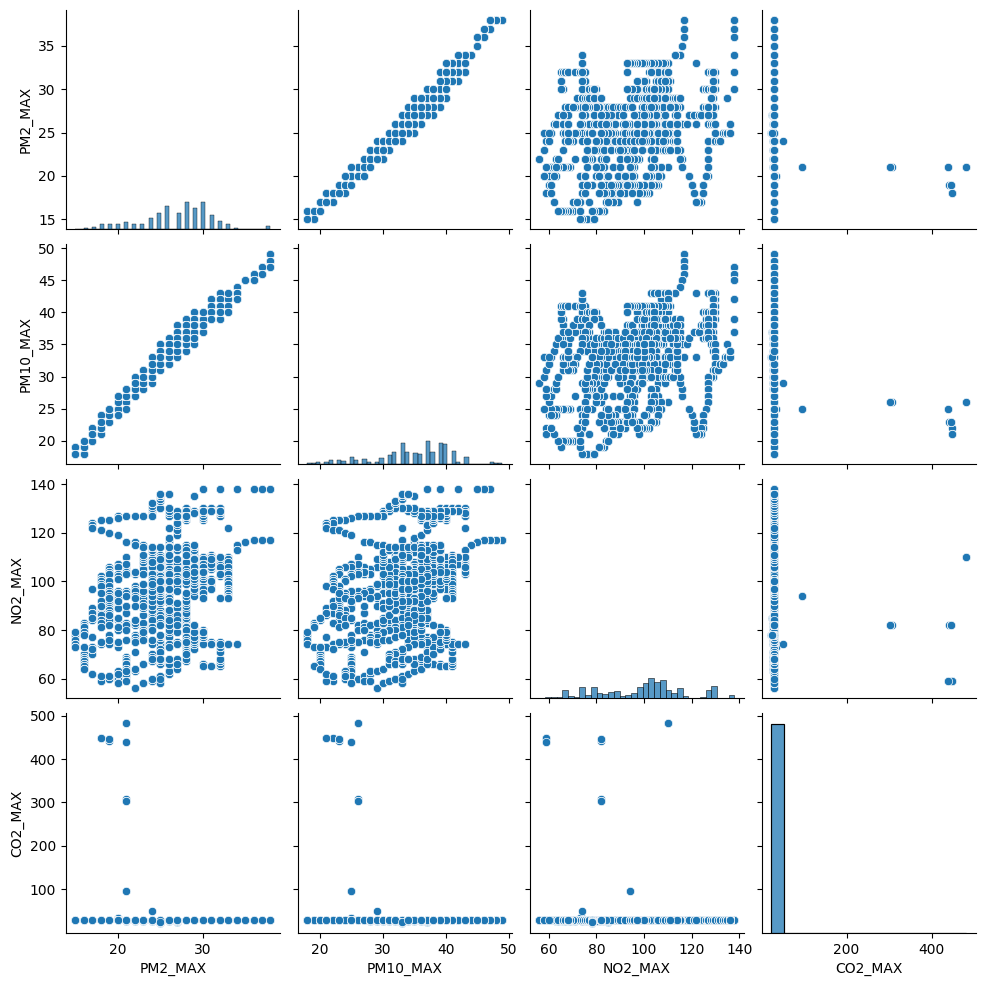

In [17]:
sns.pairplot(eda[['PM2_MAX', 'PM10_MAX', 'NO2_MAX', 'CO2_MAX']])
plt.show();

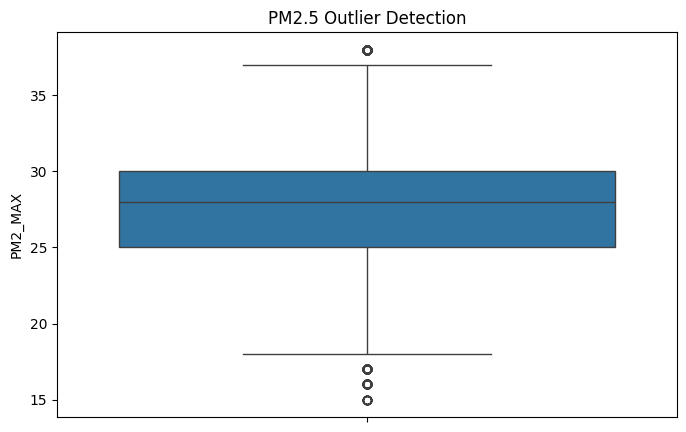

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=eda['PM2_MAX'])
plt.title("PM2.5 Outlier Detection")
plt.show();


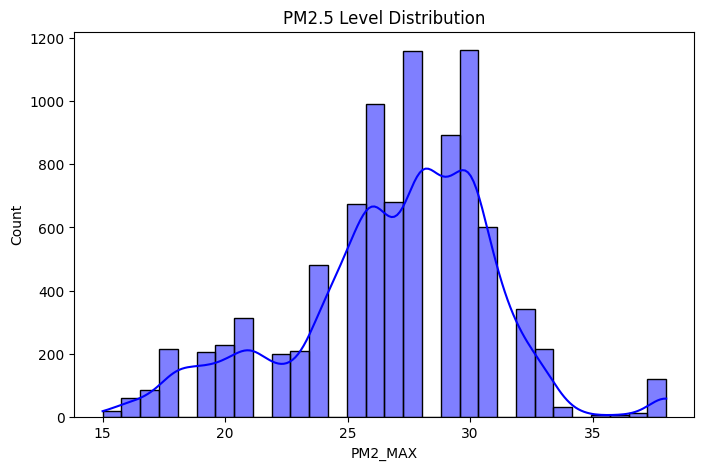

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(eda['PM2_MAX'], bins=30, kde=True, color="blue")
plt.title("PM2.5 Level Distribution")
plt.show();